In [3]:
from nltk.tokenize import sent_tokenize
import gensim

In [4]:
with open("Harry_Potter_all_books_preprocessed.txt") as f:
    data = f.read()

The text is already pretty clean, there are no extra spaces or wierd characters

In [5]:
lines = sent_tokenize(data)

In [6]:
lines[0]

'THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much .They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense .Mr Dursley was the director of a firm called Grunnings which made drills .He was a big beefy man with hardly any neck although he did have a very large mustache .Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors .The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere .The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it .They didnt think they could bear it if anyone found out about the Potters .Mrs Potter was Mrs Dursleys sister but they hadnt met for several years in 

Tokenization isn't proper probabality beacuse of '. ' is wrong.

In [7]:
import re

text = "THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much .They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense .Mr Dursley" 
replaced_text = re.sub(r'\s\.([A-Z])', r'. \1', text)

print(replaced_text)

THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much. They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense. Mr Dursley


Now we can apply this to entire corpus

In [8]:
corpus = re.sub(r'\s\.([A-Z])', r'. \1', data)

In [9]:
lines = sent_tokenize(corpus)

In [10]:
lines[0]

'THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much.'

Now it works fine! Let's further tokenize and clean the text using gensim

In [11]:
tokens = []
for line in lines:
    tokens.append(gensim.utils.simple_preprocess(line))

In [12]:
tokens[0]

['the',
 'boy',
 'who',
 'lived',
 'mr',
 'and',
 'mrs',
 'dursley',
 'of',
 'number',
 'four',
 'privet',
 'drive',
 'were',
 'proud',
 'to',
 'say',
 'that',
 'they',
 'were',
 'perfectly',
 'normal',
 'thank',
 'you',
 'very',
 'much']

In [13]:
len(tokens)

63880

In [14]:
model = gensim.models.Word2Vec(
window =  5,
min_count = 10,
sg = 1,
negative = 10
)

In [15]:
model.build_vocab(tokens)

In [16]:
model.train(tokens, total_examples=model.corpus_count, epochs=model.epochs)

(3821923, 5268160)

In [17]:
embedding_matrix = model.wv.vectors
embedding_dimensions = embedding_matrix.shape[1]

# Print the dimensions of the embeddings
print("Embedding Dimensions:", embedding_dimensions)

Embedding Dimensions: 100


In [18]:
model.wv.most_similar("hermione")

[('luna', 0.6813601851463318),
 ('parvati', 0.6632225513458252),
 ('awkwardly', 0.6444247364997864),
 ('ron', 0.6407602429389954),
 ('amazed', 0.6406340003013611),
 ('mock', 0.6323784589767456),
 ('leanne', 0.6277064085006714),
 ('demelza', 0.6266119480133057),
 ('hurriedly', 0.6250259280204773),
 ('pointedly', 0.6241830587387085)]

In [45]:
characters = [
"harry",
"ron",
"hermione",
"dumbledore",
"voldemort",
"snape",
"sirius",
"draco",
"hagrid",
"neville",
"dobby",
"moody",
"lupin",
"bellatrix"]

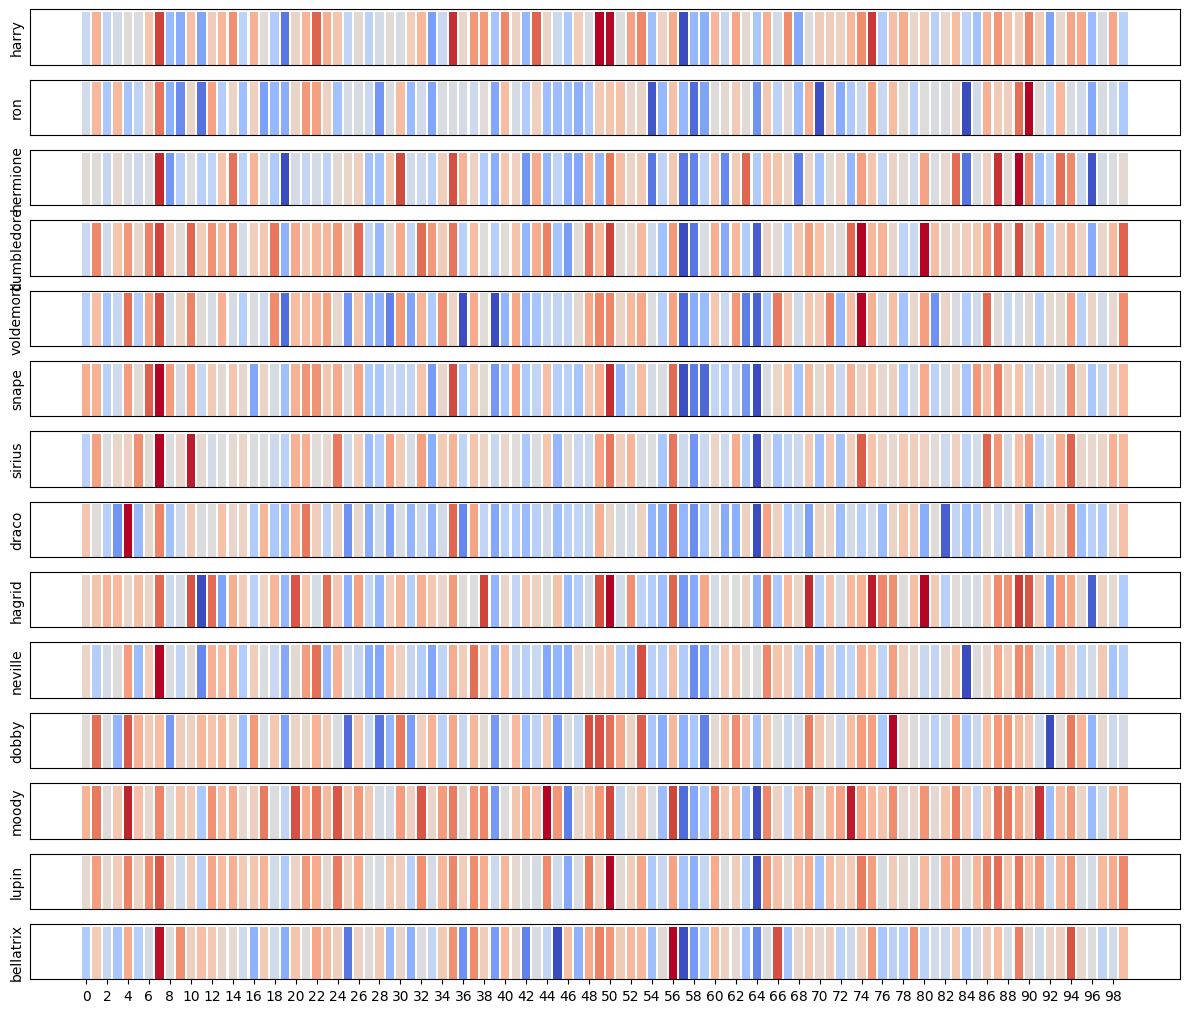

In [50]:
import numpy as np
import matplotlib.pyplot as plt


num_elements = len(characters)
fig, axs = plt.subplots(num_elements, 1, figsize=(12, 10))


for i, element in enumerate(characters):

    vector = model.wv.get_vector(element)

    normalized_data = (vector - np.min(vector)) / (np.max(vector) - np.min(vector))


    cmap = plt.get_cmap('coolwarm')

   
    colors = [cmap(val) for val in normalized_data]

 
    axs[i].bar(range(len(vector)), [1] * len(vector), color=colors, align='center')


    axs[i].set_yticks([])
    axs[i].set_xticks([])
    axs[i].set_ylabel(element)


plt.tight_layout()
axs[num_elements-1].set_xticks(range(0,100, 2))

plt.show()


This plot helps to observe similiarity betweeen different characters in the movie. We can assess features of embedding 

84 - Harry's Friends </br>
99 - Age </br>
22 - Gender </br>
77 - shows dobby being different from the rest </br>
36 - Part of Voldermort Army </br>
74 - Power of the Wizard